# Clustering Crypto

In [42]:
# Initial imports
import pandas as pd
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
crypto_df = pd.read_csv("crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df.IsTrading == True]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis =1)

In [6]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [7]:
# Remove rows that have at least 1 null value.
crypto_df.dropna()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df.TotalCoinsMined > 0]

In [9]:
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [10]:
crypto_df = crypto_df.set_index(["Unnamed: 0"])

In [11]:
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [12]:
# Create a new DataFrame that holds only the cryptocurrencies names.
cryptonames_df = crypto_df[["CoinName"]]

In [13]:
cryptonames_df.head()

,CoinName
Unnamed: 0,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [14]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis = 1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [15]:
# Use get_dummies() to create variables for text features.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
crypto_df["Algorithm"] = le.fit_transform(crypto_df["Algorithm"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'1GB AES Pattern Search': 0, '536': 1, 'Argon2d': 2, 'BLAKE256': 3, 'Blake': 4, 'Blake2S': 5, 'Blake2b': 6, 'C11': 7, 'Cloverhash': 8, 'Counterparty': 9, 'CryptoNight': 10, 'CryptoNight Heavy': 11, 'CryptoNight-V7': 12, 'Cryptonight-GPU': 13, 'DPoS': 14, 'Dagger': 15, 'Dagger-Hashimoto': 16, 'ECC 256K1': 17, 'Equihash': 18, 'Equihash+Scrypt': 19, 'Ethash': 20, 'Exosis': 21, 'Green Protocol': 22, 'Groestl': 23, 'HMQ1725': 24, 'HybridScryptHash256': 25, 'IMesh': 26, 'Jump Consistent Hash': 27, 'Keccak': 28, 'Leased POS': 29, 'Lyra2RE': 30, 'Lyra2REv2': 31, 'Lyra2Z': 32, 'M7 POW': 33, 'Multiple': 34, 'NIST5': 35, 'NeoScrypt': 36, 'Ouroboros': 37, 'PHI1612': 38, 'POS 2.0': 39, 'POS 3.0': 40, 'PoS': 41, 'Proof-of-Authority': 42, 'Proof-of-BibleHash': 43, 'QUAIT': 44, 'QuBit': 45, 'Quark': 46, 'SHA-256': 47, 'SHA-256 + Hive': 48, 'SHA-256D': 49, 'SHA-512': 50, 'SHA3': 51, 'Scrypt': 52, 'Semux BFT consensus': 53, 'Shabal256': 54, 'Skein': 55, 'SkunkHash': 56, 'SkunkHash v2 Raptor': 57, 'Stan

In [16]:
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,52,PoW/PoS,4.199995e+01,42
404,52,PoW/PoS,1.055185e+09,532000000
1337,66,PoW/PoS,2.927942e+10,314159265359
BTC,47,PoW,1.792718e+07,21000000
ETH,20,PoW,1.076842e+08,0


In [17]:
le = LabelEncoder()
crypto_df["ProofType"] = le.fit_transform(crypto_df["ProofType"])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'DPOS': 0, 'DPoS': 1, 'HPoW': 2, 'LPoS': 3, 'POBh': 4, 'PoA': 5, 'PoC': 6, 'PoS': 7, 'PoS/LPoS': 8, 'PoS/PoW': 9, 'PoS/PoW/PoT': 10, 'PoST': 11, 'PoW': 12, 'PoW + Hive': 13, 'PoW and PoS': 14, 'PoW/PoS': 15, 'PoW/PoS ': 16, 'PoW/PoW': 17, 'PoW/nPoS': 18, 'Pos': 19, 'Proof of Authority': 20, 'Proof of Trust': 21, 'TPoS': 22, 'Zero-Knowledge Proof': 23, 'dPoW/PoW': 24}


In [18]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(crypto_df)
print(crypto_scaled[0:5])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [19]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [28]:
# Create a DataFrame with the three principal components.
df_crypto_pca = pd.DataFrame(
    data = crypto_pca, columns = ["Principal Component 1", "Principal Component 2", "Principal Component 3"], index = crypto_df.index
)
df_crypto_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3
Unnamed: 0,,,
42,-0.417875,0.810296,0.372138
404,-0.396564,0.815135,0.373256
1337,3.124076,2.209780,0.504335
BTC,-0.192083,0.016266,-0.072910
ETH,-0.044116,-1.167492,1.012525


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [21]:
import matplotlib.pyplot as plt

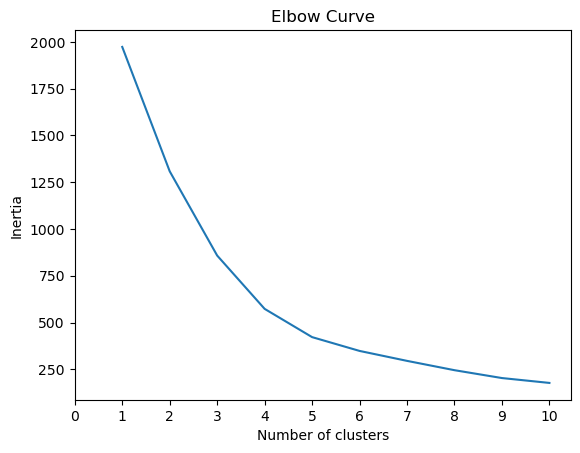

In [22]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Running K-Means with `k=4`

In [29]:
# Initialize the K-Means model.

# Fit the model
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

df_crypto_pca["class"] = model.labels_
df_crypto_pca.head()

,Principal Component 1,Principal Component 2,Principal Component 3,class
Unnamed: 0,,,,
42,-0.417875,0.810296,0.372138,0
404,-0.396564,0.815135,0.373256,0
1337,3.124076,2.209780,0.504335,0
BTC,-0.192083,0.016266,-0.072910,0
ETH,-0.044116,-1.167492,1.012525,1


In [35]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, df_crypto_pca], axis=1, join="inner")

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.concat([clustered_df, cryptonames_df], axis=1, join="inner")

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Principal Component 1,Principal Component 2,Principal Component 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,52,15,4.199995e+01,42,-0.417875,0.810296,0.372138,0,42 Coin
404,52,15,1.055185e+09,532000000,-0.396564,0.815135,0.373256,0,404Coin
1337,66,15,2.927942e+10,314159265359,3.124076,2.209780,0.504335,0,EliteCoin
BTC,47,12,1.792718e+07,21000000,-0.192083,0.016266,-0.072910,0,Bitcoin
ETH,20,12,1.076842e+08,0,-0.044116,-1.167492,1.012525,1,Ethereum
LTC,52,12,6.303924e+07,84000000,-0.217954,0.235824,-0.273789,0,Litecoin
DASH,64,15,9.031294e+06,22000000,-0.482771,1.336609,-0.110253,0,Dash
XMR,12,12,1.720114e+07,0,-0.001979,-1.518631,1.334156,1,Monero
ETC,20,12,1.133597e+08,210000000,-0.041907,-1.167016,1.012991,1,Ethereum Classic


In [34]:
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Principal Component 1,Principal Component 2,Principal Component 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,52,15,4.199995e+01,42,-0.417875,0.810296,0.372138,0,42 Coin
404,52,15,1.055185e+09,532000000,-0.396564,0.815135,0.373256,0,404Coin
1337,66,15,2.927942e+10,314159265359,3.124076,2.209780,0.504335,0,EliteCoin
BTC,47,12,1.792718e+07,21000000,-0.192083,0.016266,-0.072910,0,Bitcoin
ETH,20,12,1.076842e+08,0,-0.044116,-1.167492,1.012525,1,Ethereum


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [52]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
     clustered_df,
     x="Principal Component 3",
     y="Principal Component 2",
     z="Principal Component 1",
     color="class",
     symbol="class",
     width=800,
     hover_name= "CoinName", 
     hover_data= ["Algorithm"]
 )
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [57]:
# Create a table with tradable cryptocurrencies.
crypto_hvplot = clustered_df.hvplot.table(columns=["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "class"])
crypto_hvplot

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,class]

In [62]:
# Print the total number of tradable cryptocurrencies.
count_CoinNames = clustered_df.CoinName.nunique()
count_CoinNames

531

In [64]:
count_classes = clustered_df["class"].nunique()
count_classes

4

In [66]:
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Principal Component 1,Principal Component 2,Principal Component 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,52,15,4.199995e+01,42,-0.417875,0.810296,0.372138,0,42 Coin
404,52,15,1.055185e+09,532000000,-0.396564,0.815135,0.373256,0,404Coin
1337,66,15,2.927942e+10,314159265359,3.124076,2.209780,0.504335,0,EliteCoin
BTC,47,12,1.792718e+07,21000000,-0.192083,0.016266,-0.072910,0,Bitcoin
ETH,20,12,1.076842e+08,0,-0.044116,-1.167492,1.012525,1,Ethereum


In [67]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_df[["TotalCoinsMined", "TotalCoinSupply"]] = MinMaxScaler().fit_transform(clustered_df[["TotalCoinsMined", "TotalCoinSupply"]])

In [68]:
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,Principal Component 1,Principal Component 2,Principal Component 3,class,CoinName
Unnamed: 0,,,,,,,,,
42,52,15,0.000000,4.200000e-11,-0.417875,0.810296,0.372138,0,42 Coin
404,52,15,0.001066,5.320000e-04,-0.396564,0.815135,0.373256,0,404Coin
1337,66,15,0.029576,3.141593e-01,3.124076,2.209780,0.504335,0,EliteCoin
BTC,47,12,0.000018,2.100000e-05,-0.192083,0.016266,-0.072910,0,Bitcoin
ETH,20,12,0.000109,0.000000e+00,-0.044116,-1.167492,1.012525,1,Ethereum


In [71]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
clustered_scaled = clustered_df[["TotalCoinSupply", "TotalCoinsMined", "CoinName", "class"]]

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 

#plot_df.head(10)

In [72]:
clustered_scaled.head()

,TotalCoinSupply,TotalCoinsMined,CoinName,class
Unnamed: 0,,,,
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,1


In [75]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
clustered_scaled.hvplot.scatter(
    x="TotalCoinsMined", 
    y="TotalCoinSupply", 
    by="class", 
    hover_cols=["CoinName"]
)


:NdOverlay   [class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)